<a href="http://www.cosmostat.org/" target="_blank"><img align="left" width="300" src="http://www.cosmostat.org/wp-content/uploads/2017/07/CosmoStat-Logo_WhiteBK-e1499155861666.png" alt="CosmoStat Logo"></a>
<br>
<br>
<br>
<br>

# Scipy, Matplotlib and useful tricks applied to Cosmology

---

> Author: <a href="http://www.cosmostat.org/people/santiago-casas" target="_blank" style="text-decoration:none; color: #F08080">Santiago Casas</a>

> Email: <a href="mailto:santiago.casas@cea.fr" style="text-decoration:none; color: #F08080">santiago.casas@cea.fr</a>  
> Year: 2019  
> Version: 1.0


---
<br>

## Let's import some useful libraries

In [1]:
# Tell Jupyter to display plots in this notebook.
%matplotlib inline
##
import numpy as np #numpy for arrays and numerics
import pandas as pd  #pandas for working with ordered datasets
import scipy as sci  # for scientific functions
from scipy import interpolate  #for interpolation
from scipy import integrate  #for integration
import matplotlib.pyplot as plt  # for plotting
# Import interaction module.
from ipywidgets.widgets import *


> In this tutorial we will do some basic cosmology use functions, dictionaries, numpy arrays, matplotlib and scipy, to illustrate some of the common tools used by researchers in their everyday life.

# Cosmological redshift: easy plots

The cosmological redshift we observe in galaxies (their spectral lines move towards larger wavelengths) $z$ is related to the relative size of the observable Universe $a$, by $$a = \frac{1}{1+z}$$ 

This can be obtained from the fact that light travels in null-geodesics, since it is described as a relativistic particle.

> Let's code this in a simple function

In [2]:
def a_of_z(z):
    a=1/(1+z)
    return a 

In [3]:
z_arr = np.linspace(0.001,3, 100)

In [4]:
a_arr = a_of_z(z_arr)

In [5]:
a_arr.shape

(100,)

We can plot this using matplotlib's function `plot`, which takes an `x` and a `y` array as arguments, a format argument `fmt = '[marker][line][color]'` and many other optional keyword arguments, like `color`, linestyle, opacity and many more. Available markers, such as `o` for circles, `-.` for dot-dashed linestyles and `'r'` for colors can be checked in the <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot" target="_blank" >documentation</a> .

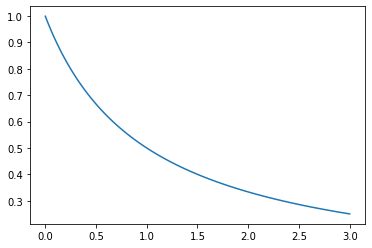

In [6]:
plt.plot(z_arr, a_arr)
plt.show()

For plots in log-log space, we can use `plt.loglog`. And it is always better to start the plot with a figure creation, since it simplifies exporting and adjustments later on.

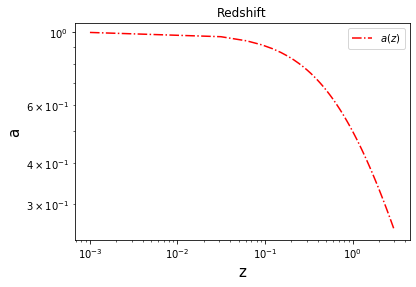

In [7]:
fig = plt.figure()
#Let's add some color and linestyle, r for red and a label for the curve.
plt.loglog(z_arr, a_arr, '-.r', label='$a(z)$')  #notice how you can use LaTeX here
#Let's add a plot title
plt.title("Redshift")
#Let's add a legend
plt.legend()
#Let's add an x-label, with some font-size
plt.xlabel("z", fontsize=15)
# and a y-label, rotated by 90 degrees (which is the default in this case anyway)
plt.ylabel("a", rotation=90, fontsize=15)   
plt.show()

# The Hubble function: working with dictionaries and optional parameters

The Hubble function $H(z)$ can be found solving Einstein's field equations of General Relativity under the Friedmann-Lemaître-Robertson-Walker metric, i.e. under the assumption of homogeneity and isotropy. It describes the expansion rate (speed) of an observable Universe of size a, $H(a) = \dot{a}/a$.

<a href="" target="_blank"><img align="center" width="300" src="./materials/planck_cosmic_pie.jpg" alt="Cosmic Pie"></a>

If we know the energy and matter components of the Universe today:
   * Cold Dark Matter density $\Omega_c$ 
   * Baryonic (normal) matter density $\Omega_b$
   * Radiation density $\Omega_r$
we can write down the Hubble function as:
$$ H(z) = H_0  \sqrt{(\Omega_c(1+z)^3 + \Omega_b(1+z)^3) + \Omega_r(1+z)^4 + \Omega_{\Lambda}}$$

where this mysterious component $\Omega_{\Lambda}$, is what we think is causing the accelerated expansion of the Universe and we think it comes from a *Cosmological constant*. In the general case where we are looking for alternatives to the cosmological constant, we call it also "Dark Energy", for the lack of a better name.

If the Universe is flat, then $\Omega_{\Lambda}$ is defined by whatever we can't observe and it's simply given by: $$ \Omega_{\Lambda} = 1 - \Omega_c - \Omega_b - \Omega_r $$

> Let's code first this constraint:

In [8]:
def Omega_L(Omega_c, Omega_b, Omega_r):
    oL = 1 - Omega_c - Omega_b - Omega_r
    return oL

> Now let's write a function for $H(z)$. If you still don't know or haven't asked, $H_0$ is the rate of expansion of the universe today and it is measured in km/s/Mpc. Its value can be inferred in many ways, from the Cosmic Microwave Background, from Gravitational Lensing or by measuring the distance to Supernovae. Currently it is a <a href="https://astrobites.org/2019/07/12/h0ly-cow-a-new-measurement-of-the-hubble-constant/" target="_blank" >hot topic</a> in cosmology, since there are strong tensions in measurements from different probes.
A value of $70$ km/s/Mpc, means that a galaxy at a distance of $1$Mpc from us, moves away from us at a speed of $70$km/s.

> To be fancy and practice some dictionary techniques, let's avoid defining so many arguments in the function and let's just pass a dictionary instead, that contains the cosmological parameters.

> This function will return default parameters when nothing is passed and can return either all the cosmological parameters or a single one.

In [9]:
def cosmological_parameters(cosmo_pars=dict(), which='all'):
    H0 = cosmo_pars.get('H0', 67.32)  # Planck 2018 cosmological parameters as default
    Oc = cosmo_pars.get('Omega_c', 0.26641)
    Ob = cosmo_pars.get('Omega_b', 0.04939)
    Or = cosmo_pars.get('Omega_r', 0.0000930479)
    Om = Ob+Oc
    OL = Omega_L(Oc, Ob, Or)
    default_dict = {'Omega_b': Ob, 
                    'Omega_c':Oc,
                     'Omega_m': Om,
                      'Omega_r':Or,
                       'Omega_L':OL,
                        'H0':H0}
    if which=='all':
        return H0, Oc, Ob, Or, Om, OL
    else:                               # this code is prone to bugs if which is not a string or not a parameter
        return default_dict[which]

In [10]:
cosmological_parameters()

(67.32, 0.26641, 0.04939, 9.30479e-05, 0.31579999999999997, 0.6841069520999999)

In [11]:
cosmological_parameters(which='Omega_m')

0.31579999999999997

> Here we have used `dict.get()` instead of `dict['key']`, since `get('key', default)` allows us to define default values in case the keys are not present in the dictionary. And we have created a keyword argument for cosmo_pars, so we can evaluate $H(z)$ with a single redshift argument:

In [12]:
def Hubble(z, cosmo_pars=dict()):
    H0, Oc, Ob, Or, Om, OL = cosmological_parameters(cosmo_pars)
    H = H0 * np.sqrt(Om*(1+z)**3 + Or*(1+z)**4 + OL)
    return H

In [13]:
# Notice how we recover the default H_0 when we evaluate at z=0.
Hubble(0.)

67.31999999999998

In [14]:
#Or how we recover another H0 that we passed as dictionary 
Hubble(0., {'H0':73})

72.99999999999999

Let's define a dictionary of cosmological parameters

In [15]:
mycosmo = {'H0': 72, 
          'Omega_c':0.32,
          'Omega_b':0.05}

In [16]:
# Now we get the H_0 we actually provided
Hubble(0., mycosmo)

71.99999999999999

> **Exercise 1**: Plot the Hubble function $H(z)$, for a newly created cosmology of your choice, next to `mycosmo` and the default Planck cosmology, using the colors `red`, `green` and `blue`, respectively. Change also the line styles (`'--', or '-' or ':'`) (You can use the `fmt` keywords or the `color` optional argument). Use a range in redshift from 0. to 10. Use linear scales for the plot `plot`. Hint: Copy as much as possible from the plotting code above.

## Matter, Radiation and Dark Energy densities as a function of time:  Complicated subplots, annotations and labeling.

The density as a function of time of any of those components can be obtained with the Hubble function as follows: 
$$ \Omega_i(z) = \frac{H_0^2 \Omega_i  (1+z)^p}{H^2(z)}$$ 
where $i$ is the component, and $p$ is the exponent corresponding to the specific component.
For matter, $p=3$, for radiation, $p=4$, for the cosmological constant $p=0$.

Let's code this one up, by first creating a dictionary of exponents:

In [17]:
cosmo_pexp = {'Omega_b': 3, 
          'Omega_c':3,
          'Omega_m':3,
             'Omega_r':4,
             'Omega_L':0}

In [18]:
def Omega_of_z(z, component='Omega_c', cosmo_pars=dict({None:0}) ):
    O_generic = cosmological_parameters(cosmo_pars, which=component)
    H0 = cosmological_parameters(cosmo_pars, which='H0')
    p = cosmo_pexp[component]
    O_of_z = (H0**2 * O_generic*(1+z)**p)/np.power(Hubble(z, cosmo_pars),2)
    return O_of_z

Let's check that the function works for a given array

In [19]:
z_arr = np.logspace(-3,2.5, 100)
Omega_of_z(z_arr)[1:5]

array([0.26703138, 0.26711618, 0.26721256, 0.26732208])

In [20]:
crazycosmo = {'H0': 75, 
          'Omega_c':0.58,
          'Omega_b':0.06, 
           'Omega_r':0.005}

> Now let's plot the evolution of matter and radiation species as a function of redshift for two different cosmologies. For this we will use the subplot functionality. There are many ways of doing this, but the most common one is `plt.subplot(Rows, Cols, *kwargs) `, where some of the optional keyword arguments are for sharing axes, for setting the figure size or for adjusting interplot spaces. It will return a figure instance and an array of axis instances, which can be indexed.

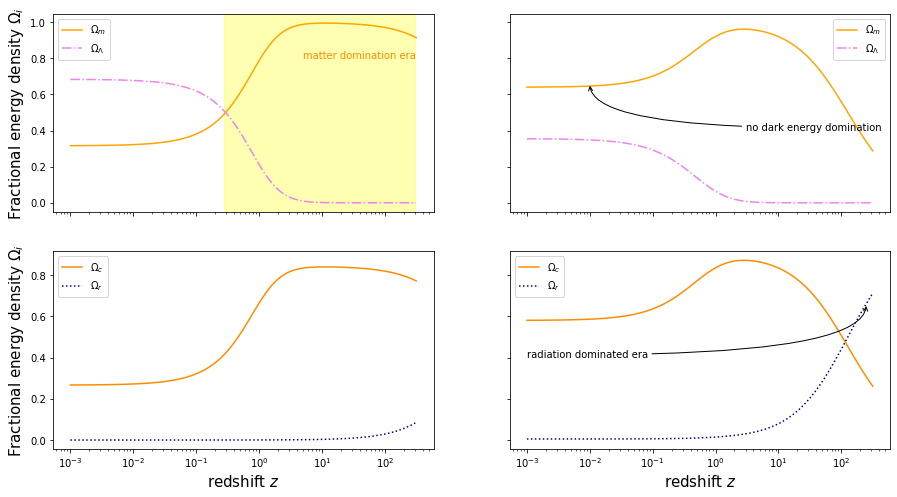

In [21]:
z_arr = np.logspace(-3,2.5, 100)
#return a figure object instance and an axis object instance
fig, ax = plt.subplots(2, 2, sharey='row', sharex='col', figsize=(15,8))  #all plots in the same row, share the y-axis.

# once you specify an axis, it is in this instance where plots are performed
ax[0,0].semilogx(z_arr, Omega_of_z(z_arr, 'Omega_m'), '-', label='$\Omega_m$', color='orange')  
ax[0,0].semilogx(z_arr, Omega_of_z(z_arr, 'Omega_L'), '-.', label='$\Omega_{\Lambda}$', color='violet')
ax[0,0].legend()
#Let's add a yellow shade for the matter domination era
ax[0,0].axvspan(0.279, 300, alpha=0.3, color='yellow')
# and let's annotate it using text()
ax[0,0].text(5,0.8, "matter domination era", size=10, color='darkorange')
ax[1,1].set_xlabel('redshift $z$', fontsize=15)   #notice the change from plt.xlabel() -> ax.set_xlabel()
ax[1,0].set_xlabel('redshift $z$', fontsize=15)
ax[0,1].semilogx(z_arr, Omega_of_z(z_arr, 'Omega_m', crazycosmo), '-', label='$\Omega_m$', color='orange')  
ax[0,1].semilogx(z_arr, Omega_of_z(z_arr, 'Omega_L', crazycosmo), '-.', label='$\Omega_{\Lambda}$', color='violet')
# Let's add an annotation with an arrow. Check the documentation for more about the settings.
ax[0,1].annotate('no dark energy domination', xy=(0.01,0.66), xytext=(3,0.4), 
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle3, angleA=0, angleB=90"))
ax[0,1].legend()
ax[1,0].semilogx(z_arr, Omega_of_z(z_arr, 'Omega_c'), '-', label='$\Omega_c$', color='darkorange')  
ax[1,0].semilogx(z_arr, Omega_of_z(z_arr, 'Omega_r'), ':', label='$\Omega_{r}$', color='darkblue')
ax[1,0].legend(loc='upper left')   #notice the different location compared to the default
ax[1,1].set_xlabel('redshift $z$', fontsize=15)   #notice the change from plt.xlabel() -> ax.set_xlabel()
ax[1,0].set_xlabel('redshift $z$', fontsize=15)
ax[1,1].semilogx(z_arr, Omega_of_z(z_arr, 'Omega_c', crazycosmo), '-', label='$\Omega_c$', color='darkorange')  
ax[1,1].semilogx(z_arr, Omega_of_z(z_arr, 'Omega_r', crazycosmo), ':', label='$\Omega_{r}$', color='darkblue')
ax[1,1].legend()
# Let's add an annotation with an arrow. Check the documentation for more about the settings.
ax[1,1].annotate('radiation dominated era', xy=(250,0.66), xytext=(0.001,0.4), 
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle3, angleA=0, angleB=90"))
ax[1,1].set_xlabel('redshift $z$', fontsize=15)   #notice the change from plt.xlabel() -> ax.set_xlabel()
ax[1,0].set_xlabel('redshift $z$', fontsize=15)   #notice that we only label the bottom 2 plots
ax[0,0].set_ylabel('Fractional energy density $\Omega_i$', fontsize=15)   #notice the change from plt.xlabel() -> ax.set_xlabel()
ax[1,0].set_ylabel('Fractional energy density $\Omega_i$', fontsize=15)   #notice that we only label the bottom 2 plots
#let's save the figure
fig.savefig('./materials/cosmological_energy_densities.png')

> **NOTE**: This plotting code seems a bit clumsy and extended, another way  of doing this, without so many lines of code, is through a proper loop and some zip() and list comprehensions.

# Hubble function: Working with external data, scipy interpolation and fit

One very useful function in numpy is `np.loadtxt` which reads very efficiently data tables and automatically ignores headers (which start usually with `#`).

In [22]:
data_h_ofz=np.loadtxt('./materials/alldataEz-H0planck-real-H0planck.txt')
data_h_ofz[1:5]

array([[0.07      , 0.997     , 0.023     ],
       [0.09      , 1.02071006, 0.17593922],
       [0.12      , 1.0147929 , 0.38413396],
       [0.17      , 1.22781065, 0.11729281]])

This data contains measurements of the dimensionless Hubble function $E(z) = H(z)/H_0$ at different redshifts and with given error bars. This data was taken using supernovae, cepheids or cosmic chronometers (measurements of the age of very massive galaxies).

Let's plot the data using the function `plt.errorbar`

<ErrorbarContainer object of 3 artists>

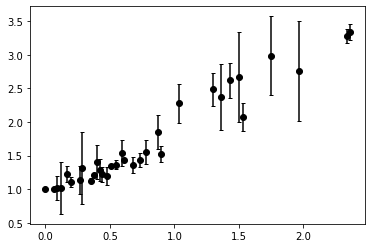

In [23]:
fig = plt.figure()
plt.errorbar(data_h_ofz[:,0], data_h_ofz[:,1], data_h_ofz[:,2], fmt='o', color='black', ecolor='black', capsize=2)

> **Exercise 2:** Overplot the dimensionless Hubble function $E(z)$, using the default cosmological parameters.

## Scipy Interpolation

Scipy is a package that includes many useful tools for scientific research, such as interpolation, fitting and integration.

First, let's compute an interpolation function through the given points.

In [24]:
# Let's use interp1d as the simplest one first
interp1_h_ofz = interpolate.interp1d(data_h_ofz[:,0], data_h_ofz[:,1])

In [25]:
# The domain of the interpolation is
data_range=[data_h_ofz[0,0],data_h_ofz[-1,0]]
data_range

[0.0, 2.36]

In [26]:
# Now we have a function of E(z)
interp1_h_ofz(0.5)

array(1.29294607)

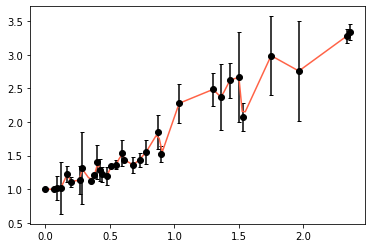

In [27]:
#Let's plot it together with the data
fig = plt.figure()
z_arr = np.linspace(data_range[0], data_range[1], 100)
plt.errorbar(data_h_ofz[:,0], data_h_ofz[:,1], data_h_ofz[:,2], fmt='o', color='black', ecolor='black', capsize=2)
plt.plot(z_arr, interp1_h_ofz(z_arr), '-', color='tomato', label='Interpolation')

In [28]:
#Now let's try a cubic and a UnivariateSpline interpolation
interp2_h_ofz = interpolate.interp1d(data_h_ofz[:,0], data_h_ofz[:,1], kind='cubic')
interp3_h_ofz = interpolate.UnivariateSpline(data_h_ofz[:,0], data_h_ofz[:,1])

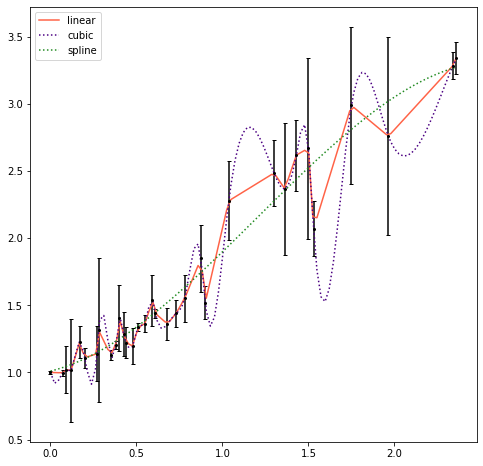

In [29]:
#Let's plot it together with the data
fig = plt.figure(figsize=(8,8))
z_arr = np.linspace(data_range[0], data_range[1], 100)
plt.errorbar(data_h_ofz[:,0], data_h_ofz[:,1], data_h_ofz[:,2], fmt='o', color='black', ecolor='black', capsize=2, 
             markersize=2)
plt.plot(z_arr, interp1_h_ofz(z_arr), '-', color='tomato', label='linear')
plt.plot(z_arr, interp2_h_ofz(z_arr), ':', color='indigo', label='cubic')
plt.plot(z_arr, interp3_h_ofz(z_arr), ':', color='forestgreen', label='spline')
plt.legend()

One can see that the result of the interpolation might differ a lot between different methods

The `UniVariateSpline` method has a `weight` optional argument `w[i]`, which sets a smoothing factor `s`. If this smoothing factor is set to `0`, the interpolation will pass through all points. By default it will be set to `s=len(w)` if `1/w[i]` is a good estimate of the standard deviation of the `y[i]` data.

> Let's use a neat trick of IPython notebooks, **`interact`**, which allows us to play with sliders on the notebook itself, to control some of the parameters.

In [30]:
z_arr = np.linspace(data_range[0], data_range[1], 100)
# Let's define a wrapper function for the above plot with the smoothing factor as an interactive parameter
def plot_interpol_data(smoothing):
    interp4_h_ofz = interpolate.UnivariateSpline(data_h_ofz[:,0], data_h_ofz[:,1], s=0)
    interp5_h_ofz = interpolate.UnivariateSpline(data_h_ofz[:,0], data_h_ofz[:,1], w=(1/data_h_ofz[:,2]) )
    interp6_h_ofz = interpolate.UnivariateSpline(data_h_ofz[:,0], data_h_ofz[:,1], s=smoothing)
    fig = plt.figure(figsize=(8,8))
    plt.errorbar(data_h_ofz[:,0], data_h_ofz[:,1], data_h_ofz[:,2], fmt='o', color='black', ecolor='black', capsize=2, 
             markersize=2)
    plt.plot(z_arr, interp3_h_ofz(z_arr), '-', color='orange', lw=3,label='auto spline')
    plt.plot(z_arr, interp4_h_ofz(z_arr), '-.', color='firebrick', lw=3,label='s=0 spline')
    plt.plot(z_arr, interp5_h_ofz(z_arr), ':', color='violet', lw=3,label='weigthed spline')
    plt.plot(z_arr, interp6_h_ofz(z_arr), '-.', color='teal', lw=3, label='smoothed spline')
    plt.legend()
    plt.show()

In [31]:
#Simply passing the function and the argument, together with a tuple, specifying (min, max, step), 
#already produces nice interactive plots.
interact(plot_interpol_data, smoothing=(0.0,1.0,0.05));

interactive(children=(FloatSlider(value=0.5, description='smoothing', max=1.0, step=0.05), Output()), _dom_cla…

> **NOTE**: Interpolating through data points with error bars is an active area of research and a not completely solved problem. The best is to test several methods and find the most appropriate one for the given case.

## Numpy polynomial fit

A very useful tool for data is to perform a polynomial fit by minimizing the equation:
$$ E = \sum_{j=0}^k |p(x_j)-y_j|^2 $$
where $p$ is a polynomial of degree $d$ for a dataset of length $k$.

In [32]:
# numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
# The weights should be w=1/sigma
# deg is the degree of the polynomial
coeffs = np.polyfit(data_h_ofz[:,0], data_h_ofz[:,1], 3, w=1/(data_h_ofz[:,2]))

The coefficients are returned from larger to smaller degree.

In [33]:
print(coeffs)

[-0.18588913  0.72546407  0.30367321  0.99711509]


One can use `poly1d` to deal with polynomials easily:

In [34]:
poly = np.poly1d(coeffs)

In [35]:
poly(np.arange(0.0,3,0.1))[0:5]

array([0.99711509, 1.03455116, 1.08538118, 1.14848981, 1.22276172])

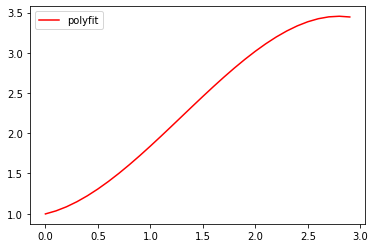

In [36]:
fig=plt.figure()
plt.plot(np.arange(0.0,3,0.1), poly(np.arange(0.0,3,0.1)), color='red', label='polyfit')
plt.legend();

> **Exercise 3:** Create an interactive plot, that shows the data with errorbars, the smoothing spline (with the same steps as before) and the polyfit with degrees 1-8, with steps of 1.

## Gaussian Processes with Scikit-Learn

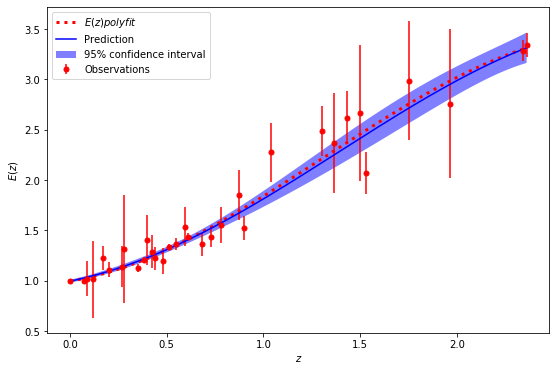

In [37]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

x = np.atleast_2d(np.linspace(data_range[0], data_range[1], 1000)).T

X = data_h_ofz[:,0]
X = np.atleast_2d(X).T

# Observations and noise
y = data_h_ofz[:,1]
dy = data_h_ofz[:,2]

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure(figsize=(9,6))
plt.plot(x, poly(x), 'r:', lw=3, label=r'$E(z) polyfit$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$z$')
plt.ylabel('$E(z)$')
plt.ylim()
plt.legend(loc='upper left')

plt.show()

## Comoving and angular diameter distance: Scipy integration

The comoving distance [in Mpc] to a galaxy far away from us, is defined as
$$ d_{\rm com}(z) = \int_0^z \frac{c \,\, \rm{d}\tilde{z}}{H(\tilde{z})}$$
where $c$ is the speed of light and $H(z)$ the Hubble function in km/s/Mpc. 

In [38]:
# speed of light
import scipy.constants as sciconst
clight = sciconst.speed_of_light/1000 #in km/s
clight

299792.458

Let's code up the integral:

In [39]:
def drdz(zp, cosmo_pars=dict()):
    return (clight)/Hubble(zp, cosmo_pars)

def d_comoving(zc, cosmo_pars=dict()):
    dd = lambda zc : drdz(zc, cosmo_pars=cosmo_pars)  
    #notice the use of a lambda function to pass the optional arguments
    int = integrate.romberg(dd,0.,zc)  #notice the use of a romberg integration
    return int

#notice the use of np.vectorize to allow for array arguments
vect_dcom = np.vectorize(d_comoving)

The distance to a galaxy at redshift $z=0.5$ is almost 2 Gpc!

In [40]:
print(vect_dcom(0.5))
print(d_comoving(0.5))

1953.0755507736164
1953.0755507736164


While the angular diameter distance $d_A$, is defined as the distance to an object of size x, that is viewed under an angle $\theta$. Doing the math, one gets simply:
$$ d_{\rm A}(z) = \frac{1}{1+z} \int_0^z \frac{c \,\, \rm{d}\tilde{z}}{H(\tilde{z})}$$

In [41]:
def d_angular(zc, cosmo_pars=dict()):
    da=(1/(1+zc)) * vect_dcom(zc, cosmo_pars=cosmo_pars)
    return da

In [42]:
d_angular(0.5)

1302.0503671824108

> Notice how this distance is smaller than the comoving one.

Let's plot both distances together, for a new cosmology!

Text(0, 0.5, 'd(z)')

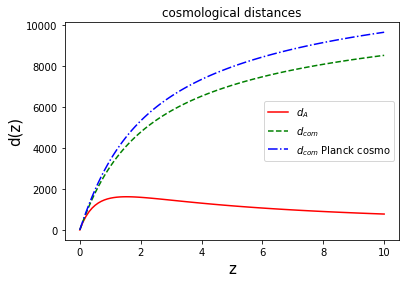

In [43]:
newcosmo = {'H0': 72, 
          'Omega_c':0.32,
          'Omega_b':0.05,
           'Omega_r':0.00001}
z_arr = np.linspace(0.,10., 100)
fig = plt.figure()
#Let's add some color and linestyle, r for red and a label for the curve.
plt.plot(z_arr, d_angular(z_arr, newcosmo), '-r', label='$d_A$')  #notice how you can use LaTeX here
plt.plot(z_arr, vect_dcom(z_arr, newcosmo), '--g', label='$d_{com}$')  #notice how you can use LaTeX here
plt.plot(z_arr, vect_dcom(z_arr), '-.b', label='$d_{com}$ Planck cosmo')  #notice how you can use LaTeX here

#Let's add a plot title
plt.title("cosmological distances")
#Let's add a legend
plt.legend()
#Let's add an x-label, with some font-size
plt.xlabel("z", fontsize=15)
# and a y-label, rotated by 90 degrees (which is the default in this case anyway)
plt.ylabel("d(z)", rotation=90, fontsize=15)   

## Integration of arrays

As we saw before, obtaining an interpolating function from sparse and noisy data is a bit tricky.

For this reason, sometimes one is forced to integrate directly the given array. Let's try this with the data we imported before. The tool for this is called `integrate.simps`. (See the documentation).

In [44]:
def data_drdz(zc, e_data, cosmo_pars=dict()):  #accepting the {z, E(z)} data
    xx = e_data[:,0]
    maxi = np.where(xx <= zc)[0][-1] + 1
    #print(maxi)
    xx = xx[:maxi]
    h0 = cosmological_parameters(cosmo_pars, which='H0')
    yy = (clight/h0)*(1/e_data[:,1])
    yy = yy[:maxi]
    return xx, yy

def data_comoving_distance(zc, e_data, cosmo_pars=dict()):  #remember the data we have is in E(z)
    xx, yy = data_drdz(zc, e_data, cosmo_pars)
    dc = integrate.simps(yy, xx)
    return dc    

#this function can't be easily vectorized, because of np.where

In [45]:
data_comoving_distance(0.5,data_h_ofz)

1884.725251061843

In [46]:
z_range = np.linspace(0.,2.5,10)

In [47]:
d_com_data = np.array([data_comoving_distance(zz, data_h_ofz) for zz in z_range])

Text(0, 0.5, 'd(z)')

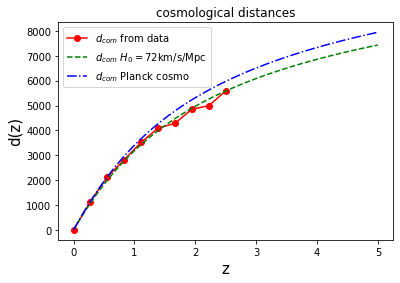

In [48]:
newcosmo = {'H0': 72,
           'Omega_r':0.00001}
z_arr = np.linspace(0.,5., 100)
fig = plt.figure()
#Let's add some color and linestyle, r for red and a label for the curve.
plt.plot(z_range, d_com_data, 'o-r', label='$d_{com}$ from data')  #notice how you can use LaTeX here
plt.plot(z_arr, vect_dcom(z_arr, newcosmo), '--g', label='$d_{com} \,\,H_0=72$km/s/Mpc')  #notice how you can use LaTeX here
plt.plot(z_arr, vect_dcom(z_arr), '-.b', label='$d_{com}$ Planck cosmo')  #notice how you can use LaTeX here

#Let's add a plot title
plt.title("cosmological distances")
#Let's add a legend
plt.legend()
#Let's add an x-label, with some font-size
plt.xlabel("z", fontsize=15)
# and a y-label, rotated by 90 degrees (which is the default in this case anyway)
plt.ylabel("d(z)", rotation=90, fontsize=15)   

> **NOTE**: Notice that despite the data being evaluated with $H_0$ from Planck (the default one), the distance at higher redshifts seems to indicate a higher value of $H_0 \approx 72$km/s/Mpc. Does this indicate some sort of tension with Planck? 

> **Puzzle:** Can you propagate the errors from $E(z)$ onto $d_{com}(z)$ and add the error bars to the red dots above?

### **Homework Exercise 4:**  
* In the materials folder you can find a file called `Fs8dataclean`.It contains `z`, $f\sigma_8 (z)$ data and its error bars.
* The function $f\sigma_8 (z)$ is an indication of how fast structures have grown in the universe.
* For the $\Lambda$CDM model, this function can be written as:
$$ f\sigma_8(z) = f(z)D(z)\sigma_{8,0}$$
* Where the growth rate is:
$$f(z) = \Omega_m (z)^{\gamma}$$ with $\gamma=0.55$
* And the growth function is:
$$D(z) = \exp \big(- \int_0^z \frac{f(\tilde{z})}{(1+\tilde{z})} \big) $$
* Finally, the free parameter is $\sigma_{8,0} = 0.83$

  1. Import the data and plot it with its error bars.
  2. Plot the data together with a couple of interpolation functions of your choice and a polynomial fit of order 3.
  3. Compute the theoretical curve, according to the points above, using integration. Does the theoretical model pass through the data points? try out different cosmological values.
  4. Compute the integral of the data alone, to obtain $D(z)$. Is it a good approximation or is the data too noisy?

> **[Answers](./Answers.ipynb) to puzzles and exercises**

## Bonus Chapter on Seaborn plots

 > Notice that despite matplotlib being a really nice library, the standard settings
produce a very rough plot and it needs a lot of tweaking to get publication-ready plots. A way to improve this quickly, is to use `seaborn`.

In [49]:
import seaborn as sns
sns.set()

Consider the example we had before in the `Numpy` lesson:

In [50]:
 data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

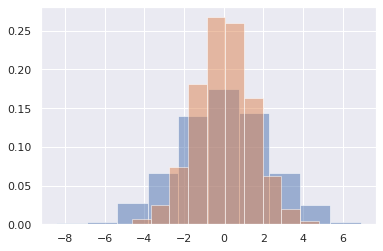

In [51]:
#matplotlib with seaborn style
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

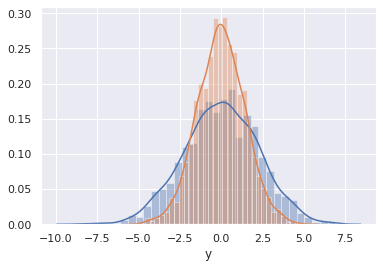

In [52]:
# pure seaborn
sns.distplot(data['x'])
sns.distplot(data['y']);

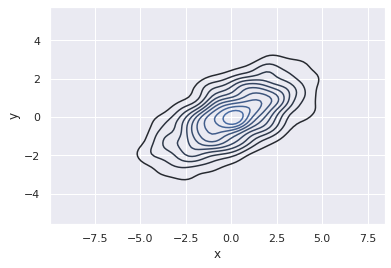

In [53]:
 sns.kdeplot(data['x'], data['y']);

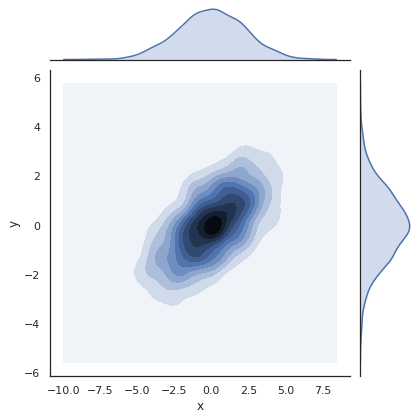

In [54]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');